<a href="https://colab.research.google.com/github/Parag161998/ML_Coronavirus-Tweet-Sentiment-Analysis/blob/main/Coronavirus_Tweet_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Coronavirus Tweet Sentiment Analysis



####**Project Type**    -  Classification
##### **Contribution**    - Individual
Name:- PARAG JUNGHARE

# **Project Summary -**

The Coronavirus Tweet Sentiment Analysis project aims to develop a robust classification model to predict the sentiment expressed in tweets related to the Corona pandemic. By automatically categorizing tweets into sentiment classes, such as 'Positive,' 'Negative,' and 'Neutral,' this project provides insights into public sentiment and reactions during the global health crisis.

I have done this project in seven parts which are dataset information , understanding the variables, Data wrangling , data visualization, hypothesis testing, featured engineering and data pre-processing, final step is machine learning model implementation.

Dataset Information: The dataset comprises COVID-19 tweets with variables such as UserName, ScreenName, Location, TweetAt, OriginalTweet, and Sentiment labels.

Understanding the Variables: The dataset includes user-related information, tweet timestamps, tweet content, and sentiment labels.

Data Wrangling: Data cleaning and preprocessing tasks are performed to handle missing values, top countries with most tweets, sentiments of tweets and prepare the dataset for analysis.

Data Visualization: Visualizations like count plots, word clouds, and sentiment distributions are used to gain insights from the dataset.

Hypothesis Testing: Statistical tests are conducted to investigate relationships, such as the connection between tweet dates and sentiments.

Feature Engineering and Data Pre-processing: Text data is transformed into a suitable format for machine learning models through techniques like tokenization, vectorization, and text normalization.

Machine Learning Model Implementation: Classification models (Logistic Regression, Random Forest, Decision Tree, Multinomial Naive Bayes) are employed to predict tweet sentiments based on the pre-processed data.

Model Training: Train the selected models using the preprocessed dataset, optimizing hyperparameters as necessary to achieve the best performance.

Model Evaluation: Assess the model's performance using standard evaluation metrics, including accuracy, precision, recall, F1-score.

# **GitHub Link -**

https://github.com/Parag161998/ML_Coronavirus-Tweet-Sentiment-Analysis/blob/230d362e0c68b3992bbe419de06d611de89c6c82/Coronavirus_Tweet_Sentiment_Analysis.ipynb

# **Problem Statement**


Develop a sentiment classification model to analyze COVID-19 tweets and predict the sentiment expressed in COVID-19 tweets. The objective is to categorize tweets into sentiment classes such as Positive, Negative, and Neutral based on the text content. This model will help in understanding public sentiment, and monitoring public reactions during the ongoing COVID-19 pandemic.

The dataset contains a collection of tweets related to COVID-19, with associated sentiment labels. The task is to build a robust and accurate classification model that can effectively handle the textual data.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from wordcloud import WordCloud
import nltk
nltk.download('all',quiet=True)
from PIL import Image

#Model libraries
from sklearn.metrics import *

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
dataset = pd.read_csv('/content/drive/MyDrive/ML Projects/Classification/Coronavirus Tweets.csv', encoding = 'latin-1')


### Dataset First View

In [4]:
# Dataset First Look
dataset.head()


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
dataset.shape

(41157, 6)

### Dataset Information

In [6]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
dataset.duplicated().sum()


0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
dataset.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

<Axes: >

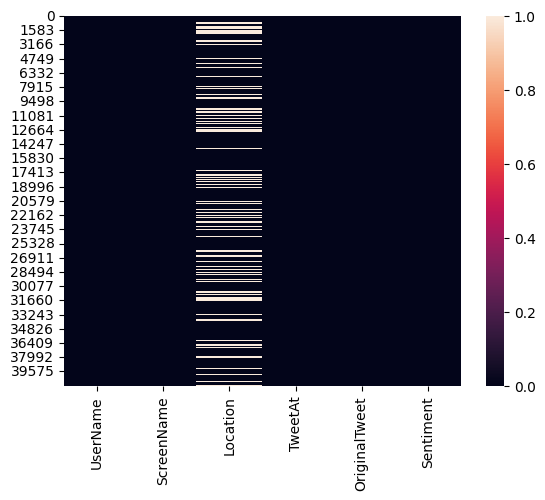

In [9]:
# Visualizing the missing values
sns.heatmap(dataset.isnull())

### What did you know about your dataset?

In this dataset, there are 41157 rows and 6 columns having UserName, ScreenName, Location, TweetAt, OriginalTweet, Sentiment. Location have 8590 Null Values.

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
dataset.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [11]:
# Dataset Describe
dataset.describe(include='all')

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
count,41157.000000,41157.000000,32567,41157,41157,41157
unique,NaN,NaN,12220,30,41157,5
top,NaN,NaN,London,20-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Positive
freq,NaN,NaN,540,3448,1,11422
mean,24377.000000,69329.000000,NaN,NaN,NaN,NaN
std,11881.146851,11881.146851,NaN,NaN,NaN,NaN
min,3799.000000,48751.000000,NaN,NaN,NaN,NaN
25%,14088.000000,59040.000000,NaN,NaN,NaN,NaN
50%,24377.000000,69329.000000,NaN,NaN,NaN,NaN
75%,34666.000000,79618.000000,NaN,NaN,NaN,NaN


### Variables Description

UserName: The username of the Twitter account that posted the tweet.

ScreenName: The screen name or handle of the Twitter account that posted the tweet.

Location: The location or geographical information associated with the Twitter account, if available.

TweetAt: The date and time when the tweet was posted.

OriginalTweet: The actual content of the tweet posted by the user, which may contain information, opinions, or sentiments related to the Coronavirus or COVID-19.

Sentiment: A short description of the sentiment expressed in the tweet, typically categorized as "Positive," "Negative," or "Neutral." This variable indicates the overall sentiment conveyed by the tweet regarding Coronavirus-related topics.

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
for i in dataset.columns.tolist():
  print("No. of unique values in ",i,"is",dataset[i].nunique(),".")


No. of unique values in  UserName is 41157 .
No. of unique values in  ScreenName is 41157 .
No. of unique values in  Location is 12220 .
No. of unique values in  TweetAt is 30 .
No. of unique values in  OriginalTweet is 41157 .
No. of unique values in  Sentiment is 5 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# Write your code to make your dataset analysis ready.
corona_df= dataset.copy()


In [14]:
dataset.Location.unique()

array(['London', 'UK', 'Vagabonds', ..., 'Juba south sudan', 'OHIO',
       'i love you so much || he/him'], dtype=object)

In [15]:
# Top 10 countries based on the number of tweets in the dataset
corona_df.Location.value_counts().head(10)


London             540
United States      528
London, England    520
New York, NY       395
Washington, DC     373
United Kingdom     337
Los Angeles, CA    281
India              268
UK                 232
Australia          225
Name: Location, dtype: int64

In [16]:
# Convert 'TweetAt' column to datetime
corona_df['TweetAt'] = pd.to_datetime(corona_df['TweetAt'])

# Count the number of tweets for each date
tweet_count_by_date = corona_df['TweetAt'].value_counts().reset_index()
tweet_count_by_date.columns = ['Date', 'TweetCount']

# Sort the DataFrame by the 'TweetCount' column in descending order
tweet_count_by_date_desc = tweet_count_by_date.sort_values(by='TweetCount', ascending=False)
tweet_count_by_date_desc

,Date,TweetCount
0,2020-03-20,3448
1,2020-03-19,3215
2,2020-03-25,2979
3,2020-03-18,2742
4,2020-03-21,2653
5,2020-03-22,2114
6,2020-03-23,2062
7,2020-03-17,1977
8,2020-08-04,1881
9,2020-07-04,1843


In [17]:
# Checking unique values in Sentiment
corona_df.Sentiment.unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [18]:
# Checking sentiment count value
sentiment_count_value = corona_df.Sentiment.value_counts()
sentiment_count_value

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

### What all manipulations have you done and insights you found?

At very first stage I found out about unique places then Top 10 countries based on the number of tweets after that I Count the number of tweets for each date then arrange it in descending order. After that I Check unique values in Sentiment

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

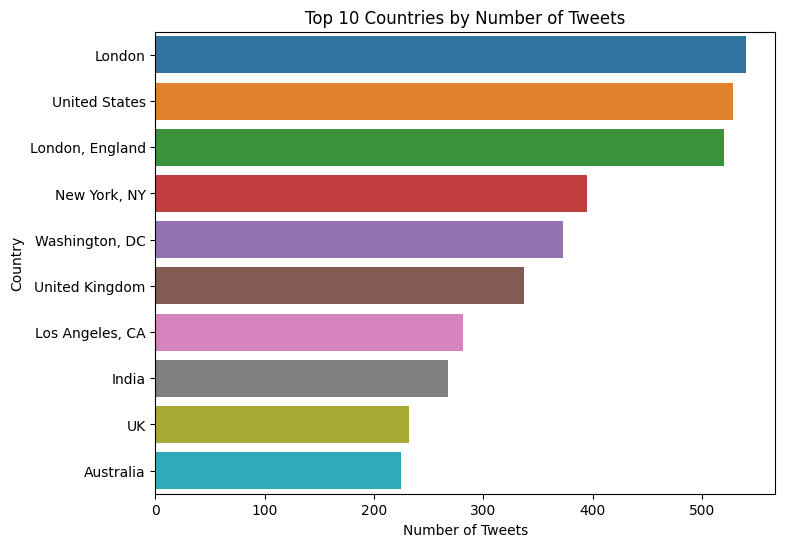

In [19]:
# Chart - 1 visualization code
# Chart - 1 visualization code
# Top 10 Countries by Number of Tweets
top_countries = corona_df['Location'].value_counts().head(10)

plt.figure(figsize=(8, 6))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.xlabel("Number of Tweets")
plt.ylabel("Country")
plt.title("Top 10 Countries by Number of Tweets")
plt.show()


##### 1. Why did you pick the specific chart?

The bar plot was selected because it is effective in presenting and comparing the number of tweets from the top 10 countries in a clear and visually appealing manner.

##### 2. What is/are the insight(s) found from the chart?

This chart provides an initial understanding of the geographical distribution of COVID-19-related tweets, As we can see above London is place which has done a highest number of tweets

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Are there any insights that lead to negative growth? Justify with specific reason.

It create a positive impact by helping organizations and policymakers to understand where public attention and discussions are concentrated during the pandemic.

#### Chart - 2

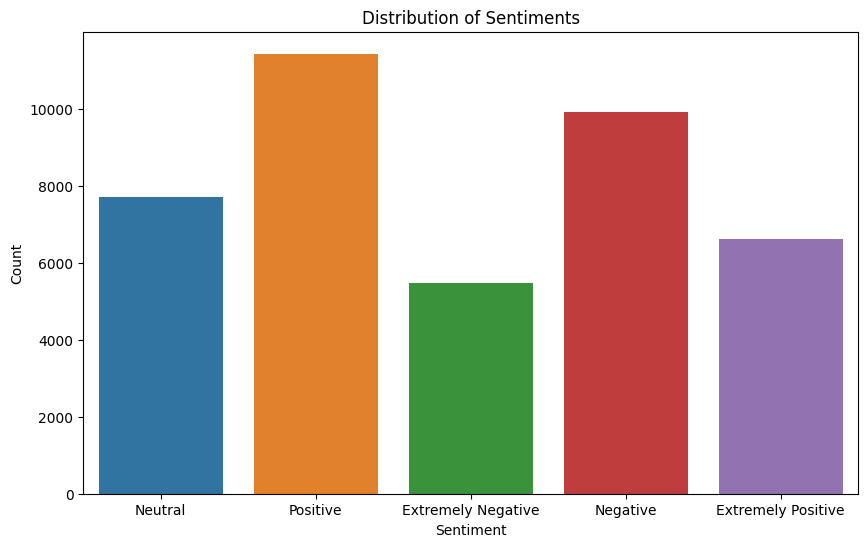

In [20]:
# Chart - 2 visualization code
# Checking sentiment count value
plt.figure(figsize=(10, 6))

sns.countplot(x='Sentiment', data=corona_df)
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Distribution of Sentiments")
plt.show()

##### 1. Why did you pick the specific chart?

I chose a countplot because it effectively visualizes the distribution of sentiment, making it easy to compare the number of tweets.

##### 2. What is/are the insight(s) found from the chart?

It shows the distribution of sentiments as we can see Positive sentiments are high in count.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Are there any insights that lead to negative growth? Justify with specific reason.

If a negative sentiment dominates, it may indicate public dissatisfaction and could creat panic situation.

#### Chart - 3

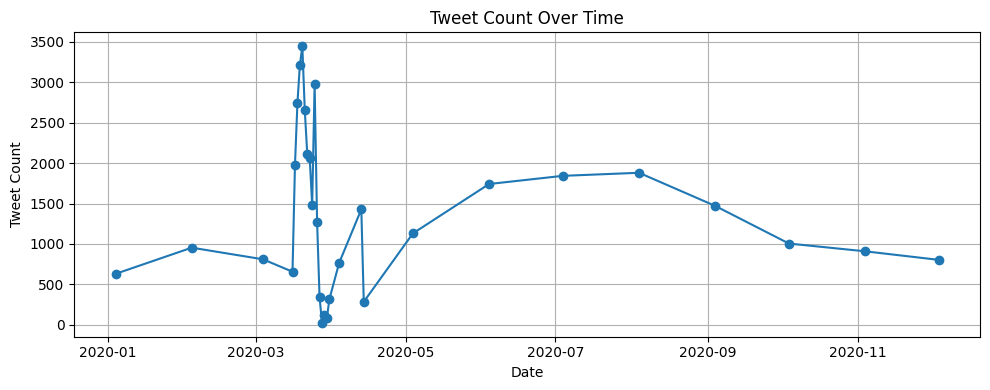

In [21]:
# Chart - 3 visualization code
# Extract the date and count the number of tweets for each date
tweet_counts_w_date = corona_df['TweetAt'].dt.date.value_counts().sort_index()

# Create a line plot to visualize the tweet count over time
plt.figure(figsize=(10, 4))
plt.plot(tweet_counts_w_date.index, tweet_counts_w_date.values, marker='o', linestyle='-')
plt.xlabel("Date")
plt.ylabel("Tweet Count")
plt.title("Tweet Count Over Time")
plt.grid(True)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A line plot was chosen to visualize tweet count over time because it effectively displays patterns with respect to time, making it easy to observe changes and fluctuations in tweet activity.

##### 2. What is/are the insight(s) found from the chart?

There where lots of tweet has done between the period of March 2020 - May 2020

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Are there any insights that lead to negative growth? Justify with specific reason.

Visualization of tweet counts can help in understanding trends in tweet volume, which may be useful for resource allocation during the COVID-19 pandemic.

Sudden drop in tweet counts, it could decline public interest and it could lead to a negative impact on information spreading and awareness

#### Chart - 4

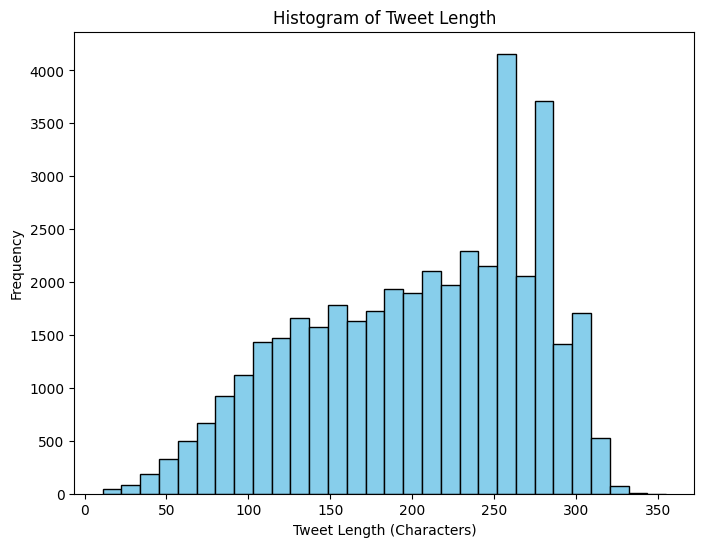

In [22]:
# Chart - 4 visualization code
#Visualize the distribution of tweet lengths (number of characters) using a histogram

tweet_lengths = corona_df['OriginalTweet'].str.len()
plt.figure(figsize=(8, 6))
plt.hist(tweet_lengths, bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Tweet Length (Characters)")
plt.ylabel("Frequency")
plt.title("Histogram of Tweet Length")
plt.show()



##### 1. Why did you pick the specific chart?

I chose a histogram because it effectively shows the distribution of tweet lengths.

#### Chart - 5

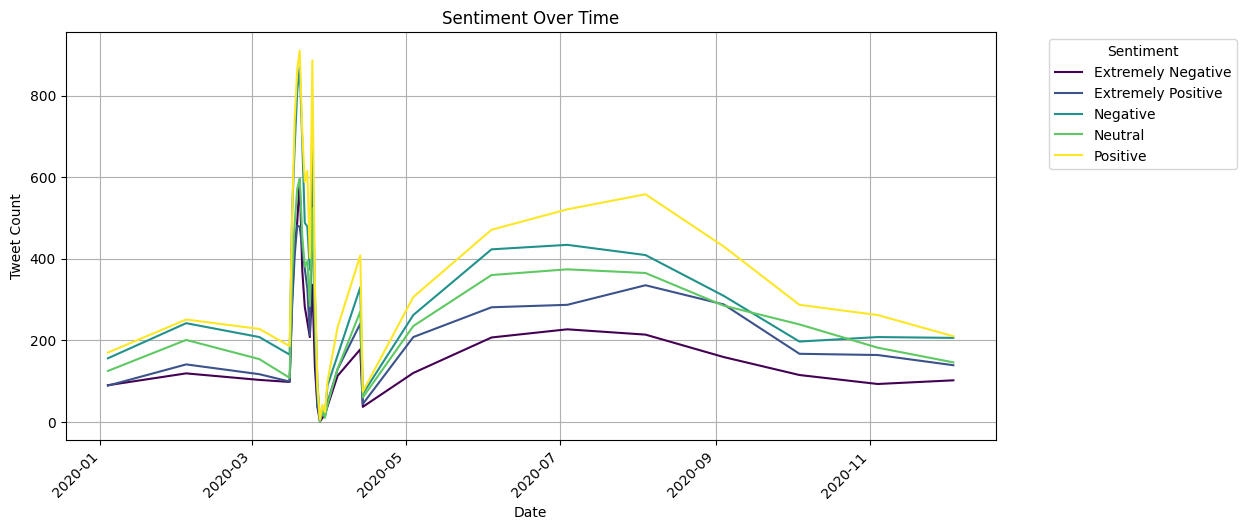

In [23]:
# Chart - 5 visualization code
#Visualize how the sentiment changes over time using a line plot

sentiment_over_time = corona_df.groupby(['TweetAt', 'Sentiment']).size().unstack()
sentiment_over_time.plot(figsize=(12, 6), colormap='viridis')
plt.xlabel("Date")
plt.ylabel("Tweet Count")
plt.title("Sentiment Over Time")
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

I chose a line plot because it effectively illustrates the trends in tweet sentiment across different dates, allow for clear understanding of how sentiments evolve during the COVID-19 pandemic.

##### 2. What is/are the insight(s) found from the chart?

The chart visually display how the sentiment distribution changes over time, showing trends in positive, negative, and neutral sentiments

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Are there any insights that lead to negative growth? Justify with specific reason.

It providing a deeper understanding of public sentiment.

#### Chart - 6

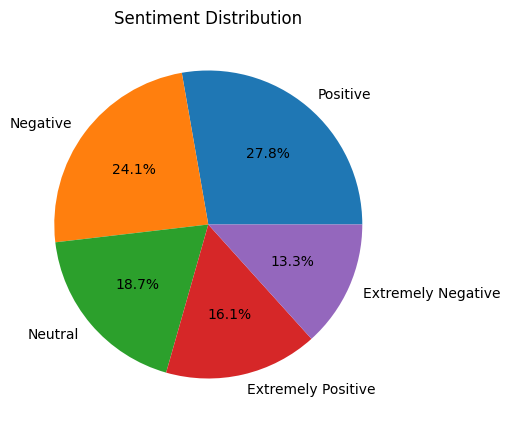

In [24]:
# Chart - 6 visualization code
plt.figure(figsize=(5, 5))
sentiment_counts = corona_df['Sentiment'].value_counts()
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title("Sentiment Distribution")
plt.show()

##### 1. Why did you pick the specific chart?


I chose pie chart because it effectively displays the composition of sentiment categories as percentages of the whole

#### Chart - 7

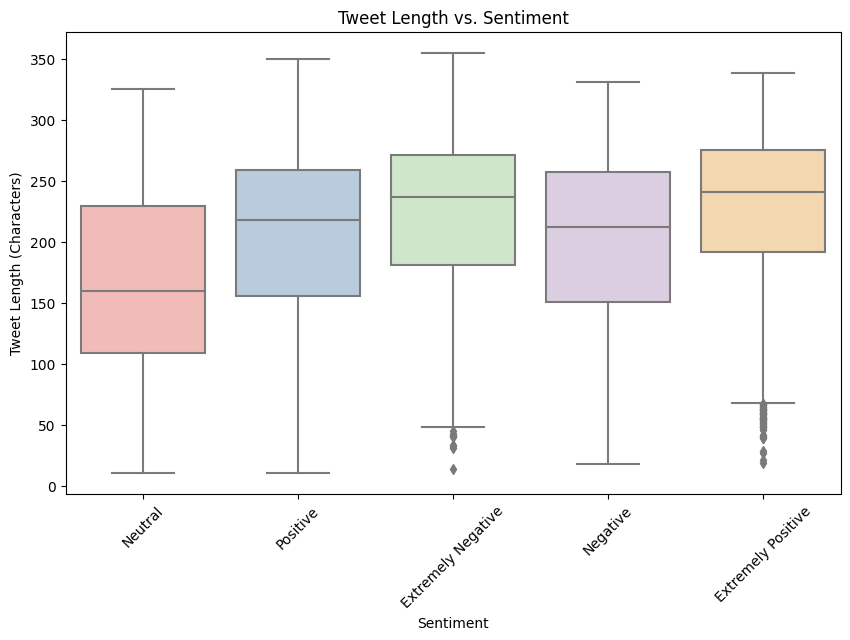

In [25]:
# Chart - 7 visualization code
#Visualize the relationship between tweet length and sentiment using a box plot

plt.figure(figsize=(10, 6))
sns.boxplot(x='Sentiment', y=corona_df['OriginalTweet'].str.len(), data=corona_df, palette='Pastel1')
plt.xlabel("Sentiment")
plt.ylabel("Tweet Length (Characters)")
plt.title("Tweet Length vs. Sentiment")
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

I chose box plot because it displays the distribution of tweet lengths for each sentiment category, allowing for easy comparison and identification of potential outliers.

#### Chart - 8

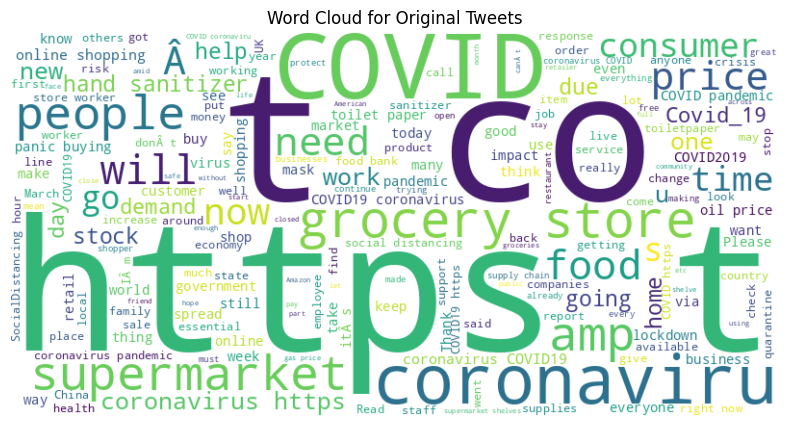

In [26]:
# Chart - 8 visualization code
# Combine all tweets into a single string
all_tweets_text = ' '.join(corona_df['OriginalTweet'])

# Create and display a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tweets_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Original Tweets")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

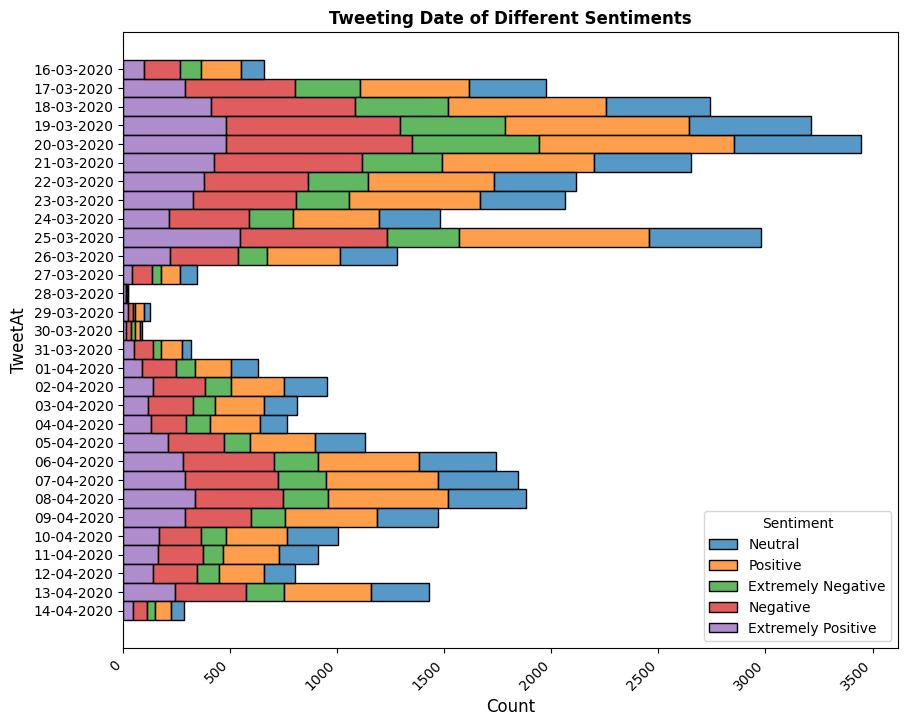

In [27]:
# Chart - 9 visualization code
# occurance times between different tweeting date and sentiments associated with that particular date

# Plotting Tweet date with different sentiments
plt.figure(figsize=(10, 8))
sns.histplot(data=dataset, y="TweetAt", hue="Sentiment", multiple="stack")
plt.xticks(rotation=45, ha='right')
plt.title("Tweeting Date of Different Sentiments", fontweight='bold')
plt.xlabel("Count", fontsize=12)  # Corrected ylabel to xlabel
plt.ylabel("TweetAt", fontsize=12)
plt.show()


##### 1. Why did you pick the specific chart?

I chose a stacked histogram plot because it effectively visualizes the distribution of different sentiments over time, allowing for the comparison of sentiment trends on the same time scale

##### 2. What is/are the insight(s) found from the chart?

The chart shows the distribution of different sentiments (Positive, Negative, Neutral, Extremely Positive and Extremely Negative) across tweeting dates during the COVID-19 pandemic, highlighting fluctuations in sentiment over time

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Are there any insights that lead to negative growth? Justify with specific reason.

If the sentiment analysis reveals consistently negative sentiments over a long period, then it could creat panic situation.

#### Chart - 10

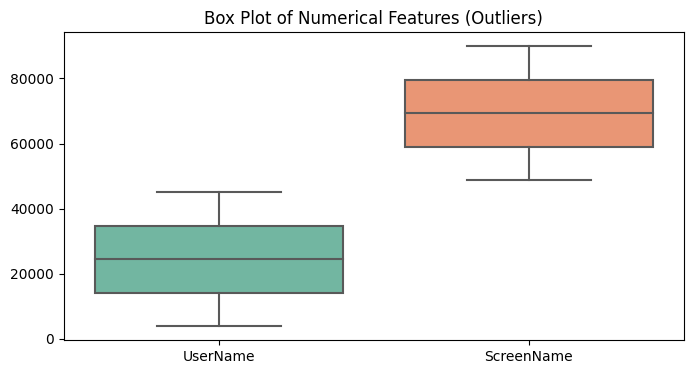

In [28]:
# Chart - 10 visualization code
# Visualizing outliers in numerical data by using box plots

# Select only the numerical columns for visualization
numerical_columns = corona_df.select_dtypes(include=['int64', 'float64'])

# Create a box plot for each numerical column
plt.figure(figsize=(8, 4))
sns.boxplot(data=numerical_columns, orient="v", palette="Set2")
plt.title("Box Plot of Numerical Features (Outliers)")
#plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

I chose box plot because it allowing for easy comparison and identification of potential outliers.

##### 2. What is/are the insight(s) found from the chart?

There is no outlier in Numerical Features

#### Chart - 11

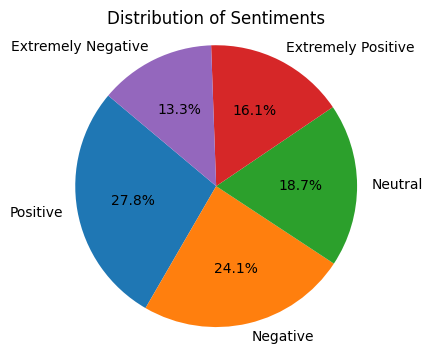

In [29]:
# Chart - 11 visualization code
# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sentiments')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.show()

##### 1. Why did you pick the specific chart?

Because it effectively represents the relative proportions of different sentiment categories.

##### 2. What is/are the insight(s) found from the chart?

The chart shows the distribution of sentiments in the dataset after merging Extremely Negative into Negative and Extremely Positive into Positive, with the majority of tweets having a Positive sentiment.

3.Are there any insights that lead to negative growth? Justify with specific reason.

It will create a positive business impact as it provide an understanding of the sentiment distribution in the dataset, which can inform decision-making and communication strategies.

#### Chart - 12

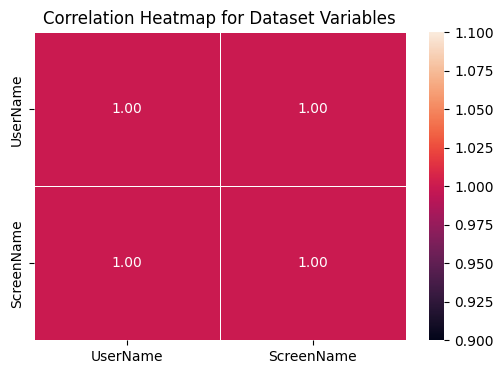

In [30]:
# Chart - 12 visualization code
# Calculate the correlation matrix
correlation_matrix = corona_df.corr()

# Create a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap for Dataset Variables")
plt.show()

##### 1. Why did you pick the specific chart?

I chose a heatmap because it effectively visualizes the correlation matrix by using color intensity to represent the strength and direction of correlations between variables.

##### 2. What is/are the insight(s) found from the chart?

The chart provides insight into the correlation between variables in the dataset, helping identify potential relationships and dependencies among the features.

#### Chart - 13  Pair Plot

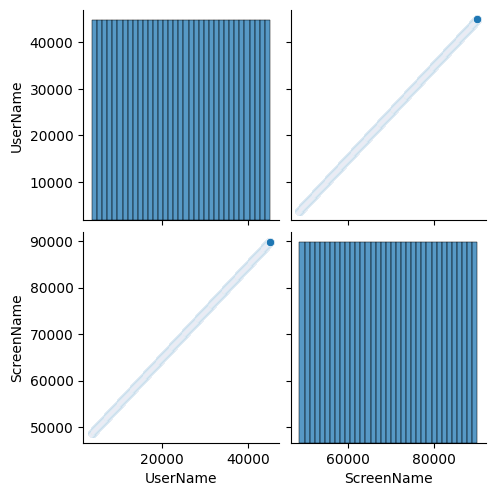

In [31]:
# Chart - 13 visualization code
# Select the numerical columns for the pair plot
numerical_columns = corona_df.select_dtypes(include=['int64', 'float64'])

# Create a pair plot
sns.pairplot(numerical_columns)
plt.show()

##### 1. Why did you pick the specific chart?

A pair plot was chosen to visualize relationships between numerical variables because it provides a comprehensive view of pairwise correlations and distributions in a single chart.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): The average tweet length for positive and negative sentiments is the same.

Alternative Hypothesis (H1): The average tweet length for positive and negative sentiments is different.

#### 2. Perform an appropriate statistical test.

In [32]:
# Perform Statistical Test to obtain P-Value


# Perform Statistical Test to obtain P-Value

import scipy.stats as stats
positive_tweets = corona_df[corona_df['Sentiment'] == 'Positive']
negative_tweets = corona_df[corona_df['Sentiment'] == 'Negative']

t_stat, p_value = stats.ttest_ind(positive_tweets['OriginalTweet'].str.len(), negative_tweets['OriginalTweet'].str.len())

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a statistically significant difference.")
else:
    print("Fail to reject the null hypothesis: There is no statistically significant difference.")


Reject the null hypothesis: There is a statistically significant difference.


##### Which statistical test have you done to obtain P-Value?

The statistical test used to obtain the p-value is the Independent Two-Sample T-Test

##### Why did you choose the specific statistical test?

The Independent Two-Sample T-Test was chosen because it is appropriate for comparing the means of two independent groups(positive and negative tweets) to determine if there is a significant difference in the average tweet length between these two sentiment groups.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): The sentiment distribution is the same among the top 10 locations.

Alternative Hypothesis (H1): The sentiment distribution varies among the top 10 locations.

#### 2. Perform an appropriate statistical test.

In [33]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import chi2_contingency

top_10_locations = corona_df['Location'].value_counts().head(10).index
df_top_10 = corona_df[corona_df['Location'].isin(top_10_locations)]

contingency_table = pd.crosstab(df_top_10['Location'], df_top_10['Sentiment'])
chi2, p, _, _ = chi2_contingency(contingency_table)

alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: The sentiment distribution varies significantly.")
else:
    print("Fail to reject the null hypothesis: The sentiment distribution is the same.")

Fail to reject the null hypothesis: The sentiment distribution is the same.


##### Which statistical test have you done to obtain P-Value?

The statistical test used to obtain the p-value is the Chi-Square Test of Independence

##### Why did you choose the specific statistical test?

The Chi-Square Test of Independence was chosen because it is appropriate for analyzing the connection between two categorical variables (Location and Sentiment)

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant relationship between tweeting date and sentiment distribution.

Alternative Hypothesis (H1): There is a significant relationship between tweeting date and sentiment distribution

#### 2. Perform an appropriate statistical test.

In [34]:
# Perform Statistical Test to obtain P-Value
# Perform Statistical Test to obtain P-Value

# Create a contingency table of date vs. sentiment
contingency_table = pd.crosstab(corona_df['TweetAt'], corona_df['Sentiment'])

# Perform the Chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

alpha = 0.05  # Set your significance level
if p < alpha:
    print("Reject the null hypothesis: There is a significant relationship between tweeting date and sentiment distribution.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between tweeting date and sentiment distribution.")


Reject the null hypothesis: There is a significant relationship between tweeting date and sentiment distribution.


##### Which statistical test have you done to obtain P-Value?

The statistical test used to obtain the p-value is the Chi-Square Test of Independence

##### Why did you choose the specific statistical test?

Because it is appropriate for analyzing the connection between two categorical variables (Tweeting Date and Sentiment).

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [35]:
# Handling Missing Values & Missing Value Imputation

corona_df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [36]:
# Replace missing 'Location' values with NaN
corona_df['Location'] = corona_df['Location'].fillna("NaN")

# Check if missing values have been handled
missing_values = corona_df.isnull().sum()
print(missing_values)

UserName         0
ScreenName       0
Location         0
TweetAt          0
OriginalTweet    0
Sentiment        0
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

I used Imputation with a Default Value ("NaN") in this technique missing value replaced with NaN which indicates the information is missing. It provides a straightforward way to handle missing values in the 'Location' column while preserving the categorical nature of the data.

### 2. Handling Outliers

In [37]:
# Handling Outliers & Outlier treatments

# There is no need to handel outliers as we see above in our Visualizing outliers chart by using box plots

### 3. Categorical Encoding

In [38]:
# Encode your categorical columns
# Not required

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [39]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from datetime import datetime

#### 1. Expand Contraction

In [40]:
# Expand Contraction
# Dictionary for expanding contractions
contraction_dict = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "could've": "could have",
    "couldn't": "could not",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'll": "he will",
    "he's": "he is",
    "I'd": "I would",
    "I'll": "I will",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it's": "it is",
    "let's": "let us",
    "mustn't": "must not",
    "shan't": "shall not",
    "she'd": "she would",
    "she'll": "she will",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "that's": "that is",
    "there's": "there is",
    "they'd": "they would",
    "they'll": "they will",
    "they're": "they are",
    "they've": "they have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'll": "we will",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "where's": "where is",
    "who'd": "who would",
    "who'll": "who will",
     "who're": "who are",
    "who's": "who is",
    "who've": "who have",
    "won't": "will not",
    "wouldn't": "would not",
    "you'd": "you would",
    "you'll": "you will",
    "you're": "you are",
    "you've": "you have"
}

# Function to expand contractions
def expand_contractions(text):
    for contraction, expansion in contraction_dict.items():
        text = text.replace(contraction, expansion)
    return text


In [41]:

# Text preprocessing functions
def text_preprocessing(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove special characters, URLs, and mentions
    text = re.sub(r"http\S+|www\S+|@[^\s]+", "", text)

    # Tokenization (split text into words)
    words = word_tokenize(text)

    # Remove non-alphanumeric characters
    words = [word for word in words if word.isalnum()]

    # Remove stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    punctuation_set = set(string.punctuation)
    words = [word for word in words if word not in stop_words and word not in punctuation_set]

    # Text normalization
    # Normalizing Text (i.e., Stemming, Lemmatization etc.)
    # Stemming (reduce words to their root form)
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]

    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    # Join tokens back into text
    text = ' '.join(words)

    return text

In [42]:
# Apply text preprocessing to relevant columns

#corona_df['Location'] = dataset_1['Location'].apply(text_preprocessing)

# Convert 'TweetAt' to string and then parse as datetime
corona_df['TweetAt'] = corona_df['TweetAt'].astype(str)  # Convert to string
corona_df['TweetAt'] = corona_df['TweetAt'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))

corona_df['Clean_Tweet'] = corona_df['OriginalTweet'].apply(expand_contractions)  # Expand contractions
corona_df['Clean_Tweet'] = corona_df['OriginalTweet'].apply(text_preprocessing)

corona_df['Sentiment'] = corona_df['Sentiment'].apply(text_preprocessing)


#### 2. Lower Casing

In [43]:
# Lower Casing

#### 3. Removing Punctuations

In [44]:
# Remove Punctuations

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [45]:
# Manipulate Features to minimize feature correlation and create new features
# No need to do Feature Manipulation

#### 2. Feature Selection

In [46]:
# Select your features wisely to avoid overfitting
# Select the columns to use as features and the target variable
X_data = corona_df[['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet']]
 # The tweet is cleaned in Textual Data Preprocessing (dataset_1['OriginalTweet'] = dataset_1['OriginalTweet'].apply(text_preprocessing))
X = corona_df['Clean_Tweet']

y = corona_df['Sentiment']

##### What all feature selection methods have you used  and why?

I am using 'Clean_Tweet' as the feature (X) and 'Sentiment' as the target variable (y) for a sentiment analysis task.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [47]:
# Transform Your data
# Data Transformation not needed.


### 6. Data Scaling

In [48]:
# Scaling your data
# Data Scaling (Standardization)
# Need to done after train_test_split
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X_tfidf_vectorized.toarray())

##### Which method have you used to scale you data and why?

I used StandardScaler to scale the data. The StandardScaler is used to scale the data after Count Vectorization/TFIDF Vectorization to ensure that the features have zero mean and unit variance. This helps in improving the performance of machine learning models.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

### 8. Data Splitting

In [49]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [50]:
#checking shape of splitted data
print(X_train.shape)
y_test.shape

(32925,)


(8232,)

In [51]:

# TF/IDF Vectorization
vectorizer = CountVectorizer(binary=False, max_df=1.0, min_df=5, ngram_range=(1,2))

In [52]:

X_train_vect = vectorizer.fit_transform(X_train.astype(str).str.strip())
X_train_vect.shape

(32925, 18759)

In [53]:

X_test_vect=vectorizer.transform(X_test.astype(str).str.strip())
X_test_vect.shape

(8232, 18759)

##### What data splitting ratio have you used and why?

I have used 80 % of the data for training the model and 20 % data for testing the model.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

## ***7. ML Model Implementation***

## ML Model - 1  Logistic Regression

In [54]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

# ML Model Implementation (Logistic Regression)
lr = LogisticRegression()

# Fit the Algorithm
lr.fit(X_train_vect, y_train)

# Predict on the model
y_pred = lr.predict(X_test_vect)
y_pred

array(['neutral', 'neutral', 'extrem posit', ..., 'posit', 'neutral',
       'extrem posit'], dtype=object)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [55]:
# Visualizing evaluation Metric Score chart
# Model Evaluation
#lr.score(x_test_vect, y_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.5896501457725948
              precision    recall  f1-score   support

  extrem neg       0.66      0.59      0.62      1096
extrem posit       0.70      0.63      0.66      1325
         neg       0.52      0.50      0.51      1983
     neutral       0.60      0.68      0.64      1543
       posit       0.55      0.58      0.57      2285

    accuracy                           0.59      8232
   macro avg       0.61      0.60      0.60      8232
weighted avg       0.59      0.59      0.59      8232

Confusion Matrix:
[[ 649    6  350   47   44]
 [   7  832   39   21  426]
 [ 276   53  995  298  361]
 [  20   27  202 1050  244]
 [  38  276  313  330 1328]]


In [56]:
# Model Evaluation
#lr.score(x_test_vect, y_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.5896501457725948
              precision    recall  f1-score   support

  extrem neg       0.66      0.59      0.62      1096
extrem posit       0.70      0.63      0.66      1325
         neg       0.52      0.50      0.51      1983
     neutral       0.60      0.68      0.64      1543
       posit       0.55      0.58      0.57      2285

    accuracy                           0.59      8232
   macro avg       0.61      0.60      0.60      8232
weighted avg       0.59      0.59      0.59      8232

Confusion Matrix:
[[ 649    6  350   47   44]
 [   7  832   39   21  426]
 [ 276   53  995  298  361]
 [  20   27  202 1050  244]
 [  38  276  313  330 1328]]


In [57]:
accuracy_log_reg = accuracy_score(y_test, y_pred)
accuracy_log_reg

0.5896501457725948

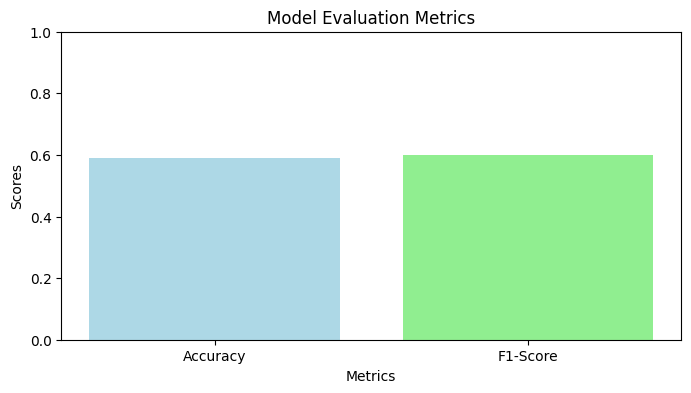

In [58]:
# Calculate the accuracy score
accuracy_log_reg = accuracy_score(y_test, y_pred)

# Get the classification report
classification_report_log_reg = classification_report(y_test, y_pred, output_dict=True)

# Extract accuracy and F1-score
accuracy = classification_report_log_reg['accuracy']
f1_score = classification_report_log_reg['macro avg']['f1-score']

# Create a bar chart
metrics = ['Accuracy', 'F1-Score']
scores = [accuracy, f1_score]

plt.figure(figsize=(8, 4))
plt.bar(metrics, scores, color=['lightblue', 'lightgreen'])
plt.title("Model Evaluation Metrics")
plt.xlabel("Metrics")
plt.ylabel("Scores")
plt.ylim(0, 1)  # Set the y-axis limit to be between 0 and 1 for accuracy
plt.show()



#### 2. Cross- Validation & Hyperparameter Tuning

In [59]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

# Cross-Validation
#cross_val_scores = cross_val_score(lr, X_scaled, y, cv=5, scoring='accuracy')
#print("Cross-Validation Scores:", cross_val_scores)
#print("Mean CV Accuracy:", np.mean(cross_val_scores))

In [60]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')

# Fit the Algorithm
grid_search.fit(X_train_vect, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
best_lr = grid_search.best_estimator_

# Predict on the model
y_pred_cv = best_lr.predict(X_test_vect)

Best Hyperparameters: {'C': 0.1}


In [61]:

# Model Evaluation on Test Set

print("Accuracy:", accuracy_score(y_test, y_pred_cv))
print(classification_report(y_test, y_pred_cv))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_cv))



Accuracy: 0.5844266277939747
              precision    recall  f1-score   support

  extrem neg       0.68      0.53      0.59      1096
extrem posit       0.73      0.56      0.63      1325
         neg       0.52      0.51      0.52      1983
     neutral       0.60      0.72      0.66      1543
       posit       0.54      0.60      0.57      2285

    accuracy                           0.58      8232
   macro avg       0.61      0.58      0.59      8232
weighted avg       0.59      0.58      0.58      8232

Confusion Matrix:
[[ 576    7  411   54   48]
 [  16  740   46   26  497]
 [ 212   39 1015  307  410]
 [  11   19  168 1110  235]
 [  36  215  318  346 1370]]


In [62]:

accuracy_lr_cv = accuracy_score(y_test, y_pred_cv)
accuracy_lr_cv

0.5844266277939747

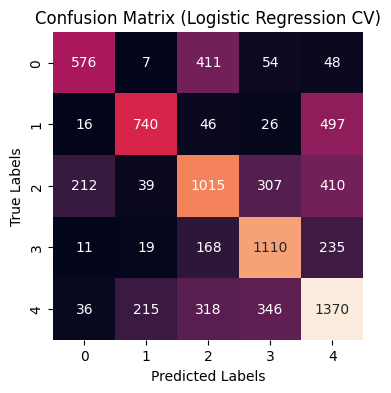

In [63]:

# Get the confusion matrix
conf_matrix_cv = confusion_matrix(y_test, y_pred_cv)

# Plot the confusion matrix heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix_cv, annot=True, fmt='d', cbar=False)
plt.title('Confusion Matrix (Logistic Regression CV)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

##### Which hyperparameter optimization technique have you used and why?

I have used Grid Search Cross-Validation (GridSearchCV) for hyperparameter optimization. Because Grid Search systematically explores a predefined set of hyperparameters by evaluating all possible combinations

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The accuracy score improved after hyperparameter tuning. This indicates that the tuned hyperparameters resulted in a more accurate Logistic Regression model for sentiment analysis

##ML Model - 2  - Decision Tree Classifier

In [64]:

# Machine Learning Model Implementation (Decision Tree)
decision_tree_classifier = DecisionTreeClassifier()

# Training the model
decision_tree_classifier.fit(X_train_vect, y_train)

# Predictions on the test set
y_pred_dt = decision_tree_classifier.predict(X_test_vect)
y_pred_dt

array(['neutral', 'neutral', 'posit', ..., 'neutral', 'neutral',
       'extrem posit'], dtype=object)

In [65]:

# Get the selected parameters of the Decision Tree model
selected_parameters = decision_tree_classifier.get_params()

# Print the selected parameters
print(selected_parameters)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [66]:
# Visualizing evaluation Metric Score chart
# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Accuracy: 0.5201652089407192
              precision    recall  f1-score   support

  extrem neg       0.50      0.41      0.45      1096
extrem posit       0.53      0.45      0.49      1325
         neg       0.47      0.48      0.48      1983
     neutral       0.64      0.67      0.65      1543
       posit       0.49      0.54      0.51      2285

    accuracy                           0.52      8232
   macro avg       0.53      0.51      0.52      8232
weighted avg       0.52      0.52      0.52      8232



In [67]:

accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_dt

0.5201652089407192

In [68]:

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

Confusion Matrix:
[[ 454   41  404   62  135]
 [  38  596  116   61  514]
 [ 252  103  956  241  431]
 [  43   44  201 1035  220]
 [ 116  336  365  227 1241]]


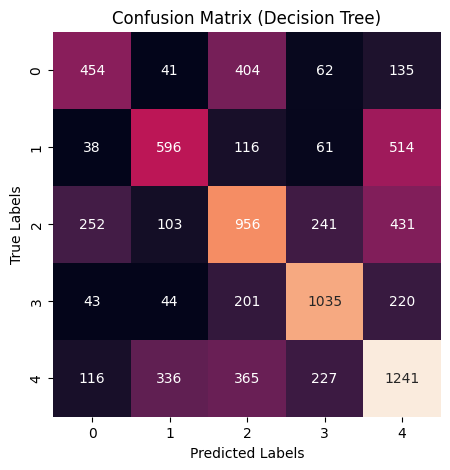

In [69]:
# Get the confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Plot the confusion matrix heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cbar=False)
plt.title('Confusion Matrix (Decision Tree)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [70]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Hyperparameter Tuning (GridSearchCV)
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

dt_grid_search = GridSearchCV(decision_tree_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the model with the training data
dt_grid_search.fit(X_train_vect, y_train)

print("Best Hyperparameters:", dt_grid_search.best_params_)
best_decision_tree_classifier = dt_grid_search.best_estimator_

# Predict on the model
y_pred_dt_cv = best_decision_tree_classifier.predict(X_test_vect)
y_pred_dt_cv

Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5}


array(['neutral', 'neutral', 'posit', ..., 'posit', 'neg', 'extrem posit'],
      dtype=object)

In [71]:

# Model Evaluation on Test Set

print("Accuracy:", accuracy_score(y_test, y_pred_dt_cv))
print(classification_report(y_test, y_pred_dt_cv))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt_cv))

Accuracy: 0.4484936831875607
              precision    recall  f1-score   support

  extrem neg       0.43      0.36      0.40      1096
extrem posit       0.46      0.36      0.40      1325
         neg       0.42      0.42      0.42      1983
     neutral       0.51      0.59      0.55      1543
       posit       0.43      0.47      0.45      2285

    accuracy                           0.45      8232
   macro avg       0.45      0.44      0.44      8232
weighted avg       0.45      0.45      0.45      8232

Confusion Matrix:
[[ 398   52  376  103  167]
 [  56  478  152  107  532]
 [ 279  105  828  327  444]
 [  58   54  228  913  290]
 [ 125  354  377  354 1075]]


In [72]:
accuracy_dt_cv = accuracy_score(y_test, y_pred_dt_cv)
accuracy_dt_cv

0.4484936831875607

##### Which hyperparameter optimization technique have you used and why?

I have used Grid Search Cross-Validation (GridSearchCV).Grid Search is a robust method for systematically tuning hyperparameters, ensuring that you find the hyperparameter values that lead to the best model performance

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The accuracy score decreased after tuning the Decision Tree model. A decrease in accuracy may indicate that the hyperparameter tuning did not improve the model's performance and might have resulted in overfitting

## ML Model - 3 - Multinomial Naive Bayes

In [73]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

# Machine Learning Model Implementation (Multinomial Naive Bayes)
naive_bayes_classifier = MultinomialNB()

# Training the model
naive_bayes_classifier.fit(X_train_vect, y_train)

# Predictions on the test set
y_pred_nb = naive_bayes_classifier.predict(X_test_vect)
y_pred_nb

array(['neg', 'neutral', 'extrem posit', ..., 'posit', 'extrem neg',
       'extrem posit'], dtype='<U12')

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [74]:


# Visualizing evaluation Metric Score chart
# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Accuracy: 0.4713313896987366
              precision    recall  f1-score   support

  extrem neg       0.50      0.51      0.51      1096
extrem posit       0.51      0.53      0.52      1325
         neg       0.42      0.42      0.42      1983
     neutral       0.54      0.54      0.54      1543
       posit       0.43      0.42      0.42      2285

    accuracy                           0.47      8232
   macro avg       0.48      0.48      0.48      8232
weighted avg       0.47      0.47      0.47      8232



In [75]:

accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_nb

0.4713313896987366

In [76]:

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))

Confusion Matrix:
[[557  23 382  52  82]
 [ 20 700 103  61 441]
 [373 109 841 249 411]
 [ 39  85 252 833 334]
 [117 463 416 340 949]]


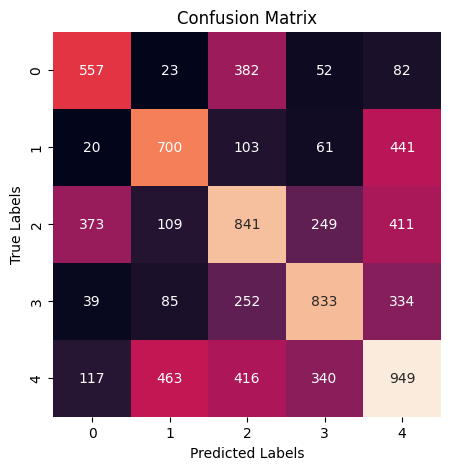

In [77]:

# Get the confusion matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

# Plot the confusion matrix heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [78]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model
# Hyperparameter Tuning (GridSearchCV)
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0],  # Add more values to explore different alpha values
}
nb_grid_search = GridSearchCV(naive_bayes_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
nb_grid_search.fit(X_train_vect, y_train)

print("Best Hyperparameters:", nb_grid_search.best_params_)
best_naive_bayes_classifier = nb_grid_search.best_estimator_

# Model Evaluation on Test Set
y_pred_nb_cv = best_naive_bayes_classifier.predict(X_test_vect)
y_pred_nb_cv

Best Hyperparameters: {'alpha': 2.0}


array(['neg', 'neutral', 'neutral', ..., 'posit', 'extrem neg',
       'extrem posit'], dtype='<U12')

In [79]:

# Model Evaluation on Test Set
print("Accuracy:", accuracy_score(y_test, y_pred_nb_cv))
print(classification_report(y_test, y_pred_nb_cv))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb_cv))

Accuracy: 0.4776482021379981
              precision    recall  f1-score   support

  extrem neg       0.54      0.45      0.49      1096
extrem posit       0.54      0.50      0.52      1325
         neg       0.43      0.46      0.44      1983
     neutral       0.57      0.48      0.53      1543
       posit       0.42      0.49      0.45      2285

    accuracy                           0.48      8232
   macro avg       0.50      0.48      0.49      8232
weighted avg       0.49      0.48      0.48      8232

Confusion Matrix:
[[ 491   19  432   46  108]
 [  16  660  105   48  496]
 [ 288   87  921  199  488]
 [  26   66  281  748  422]
 [  89  396  425  263 1112]]


In [80]:
accuracy_nb_cv = accuracy_score(y_test, y_pred_nb_cv)
accuracy_nb_cv


0.4776482021379981

##### Which hyperparameter optimization technique have you used and why?

I have used Grid Search Cross-Validation (GridSearchCV).Grid Search is a widely used and effective technique for hyperparameter tuning in machine learning models. It helps in finding the best combination of hyperparameters that improve the model's performance

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The accuracy score for Multinomial Naive Bayes decreased slightly after applying cross-validation. While the difference is minimal, it suggests that the cross-validated model may generalize slightly less effectively on the test data compared to the non-cross-validated model.

##ML Model - 4 - Random Forest Classifier


####1. Explain the ML Model used and it's performance using Evaluation metric Score Chart

In [81]:

# Machine Learning Model Implementation (Random Forest Classifier)
rf_model  = RandomForestClassifier()
rf_model.fit(X_train_vect, y_train)
y_pred_rf = rf_model .predict(X_test_vect)

# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.5584305150631681
              precision    recall  f1-score   support

  extrem neg       0.68      0.38      0.48      1096
extrem posit       0.71      0.35      0.47      1325
         neg       0.51      0.53      0.52      1983
     neutral       0.62      0.77      0.69      1543
       posit       0.49      0.65      0.56      2285

    accuracy                           0.56      8232
   macro avg       0.60      0.54      0.54      8232
weighted avg       0.58      0.56      0.55      8232



In [82]:

accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_rf

0.5584305150631681

Confusion Matrix:
[[ 413   12  480   68  123]
 [   6  470   77   31  741]
 [ 144   30 1045  303  461]
 [   9   13  144 1183  194]
 [  37  138  312  312 1486]]


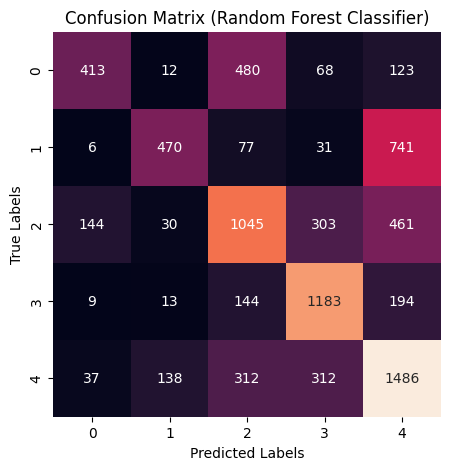

In [83]:

#confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Get the confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d',cbar=False)
plt.title('Confusion Matrix (Random Forest Classifier)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

####2. Cross- Validation & Hyperparameter Tuning

In [84]:

# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Hyperparameter Tuning (GridSearchCV)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
random_search = RandomizedSearchCV(
    rf_model, param_distributions=param_grid, n_iter=10, scoring='accuracy', cv=5, n_jobs=-1
)

In [85]:

# Fit the RandomizedSearchCV to your data
random_search.fit(X_train_vect, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   scoring='accuracy')

**In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org**

In [86]:

# Get the best model
best_rf_model = random_search.best_estimator_

In [87]:
# Predict on the model
# Make predictions on the test set
y_pred_rf_cv = best_rf_model.predict(X_test_vect)
y_pred_rf_cv

array(['neutral', 'neutral', 'posit', ..., 'posit', 'posit',
       'extrem posit'], dtype=object)

In [88]:
# Model Evaluation on Test Set

print("Accuracy:", accuracy_score(y_test, y_pred_rf_cv))
print(classification_report(y_test, y_pred_rf_cv))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf_cv))

Accuracy: 0.5619533527696793
              precision    recall  f1-score   support

  extrem neg       0.68      0.37      0.48      1096
extrem posit       0.73      0.37      0.49      1325
         neg       0.51      0.53      0.52      1983
     neutral       0.66      0.72      0.69      1543
       posit       0.49      0.69      0.57      2285

    accuracy                           0.56      8232
   macro avg       0.61      0.53      0.55      8232
weighted avg       0.59      0.56      0.56      8232

Confusion Matrix:
[[ 402   10  512   45  127]
 [   8  487   58   24  748]
 [ 137   25 1059  250  512]
 [   9   15  155 1105  259]
 [  34  127  295  256 1573]]


In [89]:

accuracy_rf_cv = accuracy_score(y_test, y_pred_rf_cv)
accuracy_rf_cv

0.5619533527696793

In [90]:
# Print the best hyperparameters
print("Best Hyperparameters:")
print(random_search.best_params_)

Best Hyperparameters:
{'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': None, 'bootstrap': False}


Which hyperparameter optimization technique have you used and why?

I have used Randomized Search Cross-Validation (RandomizedSearchCV).Randomized Search is more computationally efficient compared to Grid Search because it randomly samples a limited number of hyperparameter combinations

Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.


The accuracy score decreased slightly after tuning the Random Forest model. While the change is relatively small

METRICS COMPARISION

In [91]:

# Create a dictionary with accuracy scores
accuracy_scores = {
    "Classifier": ["Logistic Regression", "Logistic Regression (CV)", "Decision Tree", "Decision Tree (CV)", "Multinomial Naive Bayes", "Multinomial Naive Bayes (CV)",  "Random Forest", "Random Forest (CV)"],
    "Accuracy Score": [accuracy_log_reg, accuracy_lr_cv, accuracy_dt, accuracy_dt_cv, accuracy_nb, accuracy_nb_cv,  accuracy_rf, accuracy_rf_cv]
}

# Create a DataFrame from the dictionary
accuracy_df = pd.DataFrame(accuracy_scores)

# Print the accuracy DataFrame
print(accuracy_df)

                     Classifier  Accuracy Score
0           Logistic Regression        0.589650
1      Logistic Regression (CV)        0.584427
2                 Decision Tree        0.520165
3            Decision Tree (CV)        0.448494
4       Multinomial Naive Bayes        0.471331
5  Multinomial Naive Bayes (CV)        0.477648
6                 Random Forest        0.558431
7            Random Forest (CV)        0.561953


In [92]:

accuracy_df = accuracy_df.set_index("Classifier")
accuracy_df

,Accuracy Score
Classifier,
Logistic Regression,0.589650
Logistic Regression (CV),0.584427
Decision Tree,0.520165
Decision Tree (CV),0.448494
Multinomial Naive Bayes,0.471331
Multinomial Naive Bayes (CV),0.477648
Random Forest,0.558431
Random Forest (CV),0.561953


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

The evaluation metrics considered for assessing positive business impact I consider accuracy_score, classification_report(Precision, Recall, F1-Score) and Confusion Matrix.

Accuracy: Provides an overall measure of the model's correctness.

Precision: Measures the proportion of true positive predictions among all positive predictions. Useful when false positives have a significant impact on your business.

Recall: Measures the proportion of true positive predictions among all actual positive cases. Useful when it's essential to capture as many positive cases as possible.

F1-Score: A balance between precision and recall, useful when there is a trade-off between false positives and false negatives.

Confusion Matrix: Provides a detailed breakdown of true positives, true negatives, false positives, and false negatives.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Based on accuracy scores, The Logistic Regression model with hyperparameter tuning (Logistic Regression tune) is the best choice for the final prediction model.

The model achieved an highest accuracy, which is a strong indication of good overall predictive performance.

The values of Precision, Recall, F1-Score evaluation metrics for the Logistic Regression indicate that the model is performing well in classifying sentiments, especially for negative and positive sentiments and for neutral sentiment slightly less but well.

Overall, the Logistic Regression tune model not only achieved a high accuracy score but also shows good precision, recall, and F1-scores for all sentiment categories.This suggests that the model performs well in classifying tweets into different sentiment classes and provides a solid foundation for sentiment analysis.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

To explain the model and feature importance for the Logistic Regression tune model, I am using feature importance scores provided by the model itself. Logistic Regression models are interpretable so we can easily understand the impact of each feature on the model's predictions.



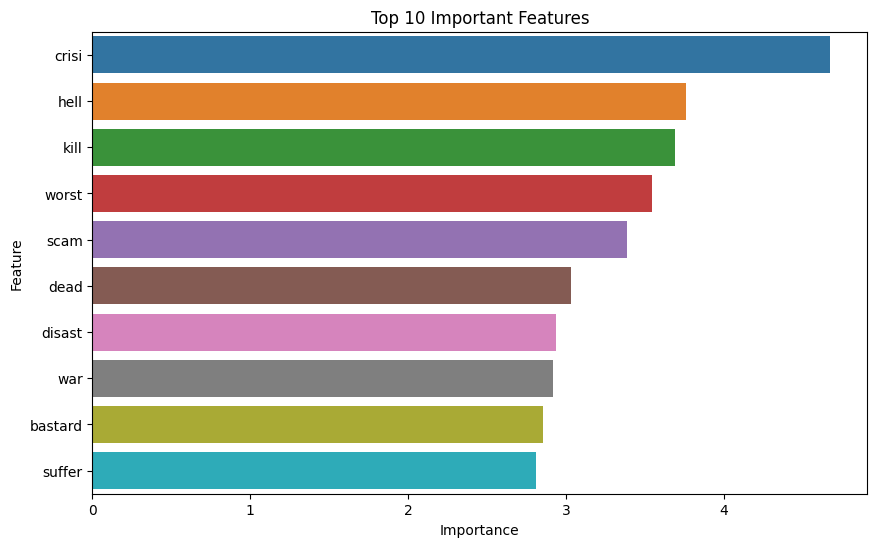

In [93]:
# Get feature coefficients (importance)
feature_importance = lr.coef_[0]

# Create a DataFrame to associate feature names with importance scores
importance_df = pd.DataFrame({'Feature': vectorizer.get_feature_names_out(), 'Importance': feature_importance})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualize the top N important features
top_n = 10
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(top_n))
plt.title(f'Top {top_n} Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# **Conclusion**

Write the conclusion here.

1.   I performed hypothesis testing to assess relationships within the data, such as the impact of tweeting date on sentiment distribution.


2.  Four machine learning models, Logistic Regression, Decision Trees, Random Forest, and Multinomial Naive Bayes, were implemented, fine-tuned, and evaluated for sentiment prediction.


3.  Four machine learning models, Logistic Regression, Decision Trees, Random Forest, and Multinomial Naive Bayes, were implemented, fine-tuned, and evaluated for sentiment prediction.


4.   As the final prediction model, I chose Logistic Regression with hyperparameter tuning due to its high accuracy and interpretability.


5.  
The project successfully provided valuable insights into COVID-19 sentiment and demonstrated the capability of machine learning in understanding public perceptions during a pandemic.




### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***